# Введение в искусственные нейронные сети
# Урок 7. Дектирование объектов

### После урока, меня заинтересовала новая четвертая версия архитектуры для решения задачи object detection YOLO.
При подготовке материала воспользовался ресурсом https://medium.com/@riteshkanjee/yolov4-superior-faster-more-accurate-object-detection-7e8194bf1872
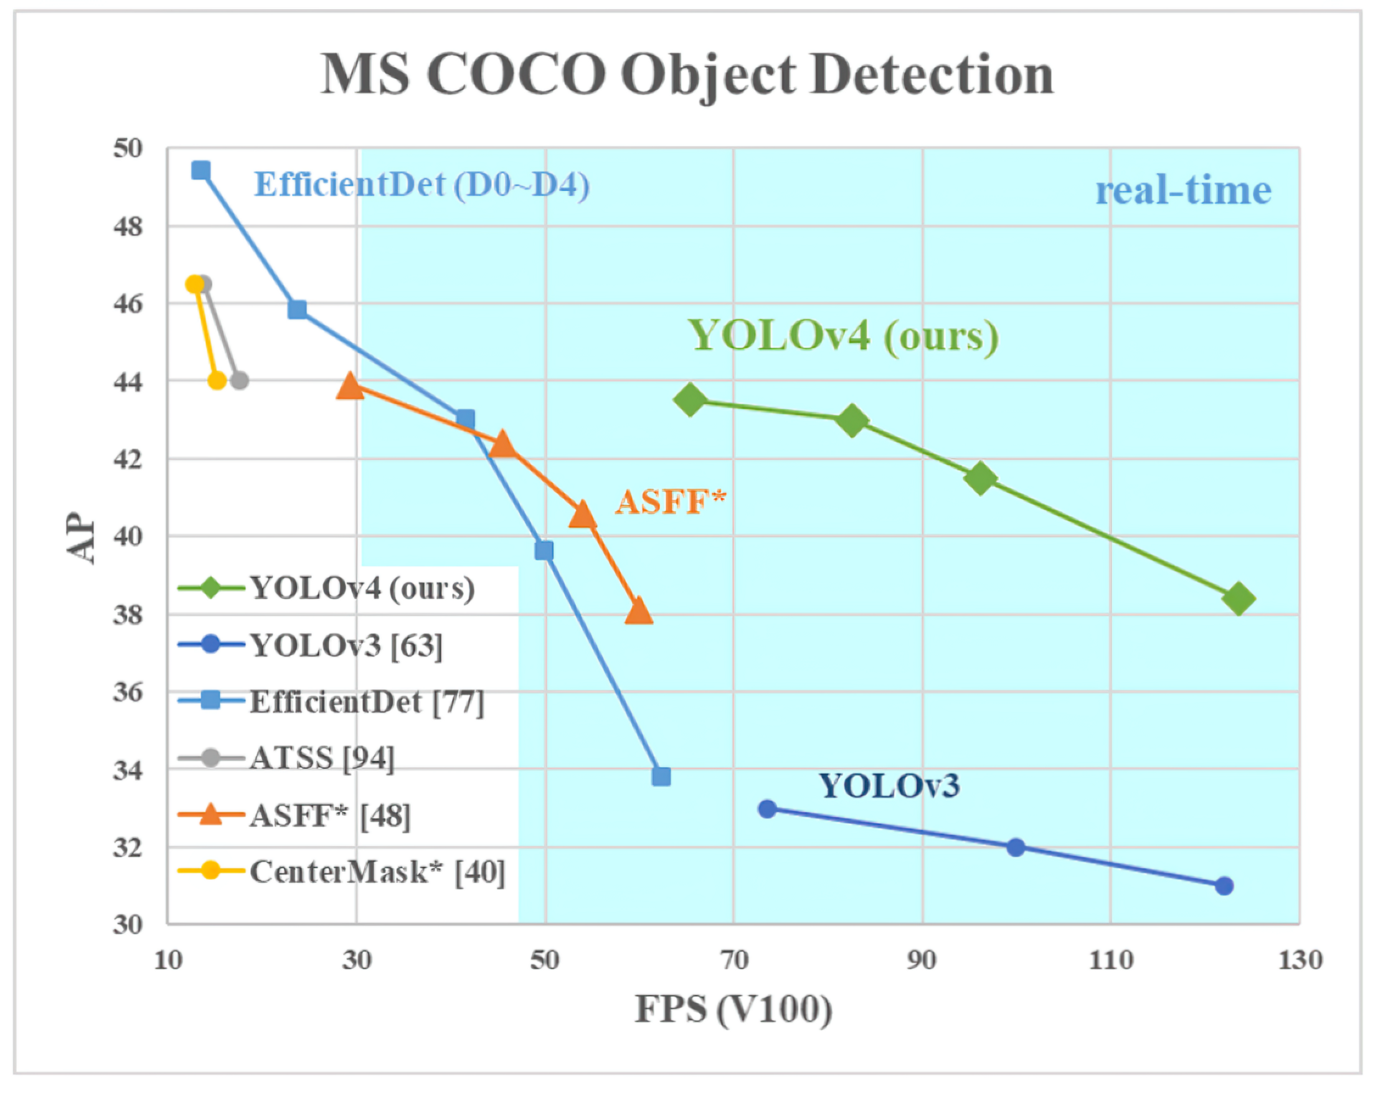

Работали над четвертой версией три чувака: Алексей Бочковский, Цзянь Яо и Хон-юань. Их работа выложена по ссылке https://arxiv.org/abs/2004.10934v1

Автор статьи напоминает, что создатели YOLO версий 1-3 это Джозеф Редмон и Али Фархади. И приводит скрин, где Джозеф Редмон написал в Твиттере в феврале 2020 года, что он прекратил исследования в области компьютерного зрения из-за того, что эта технология использовалась для военных целей, и что проблемы конфиденциальности оказывали влияние на общество. Али Фархади продолжал развивать свою компанию под названием xnor.ai который специализировался на ультрасовременном ИИ. 
По данным Forbes, эту компанию приобрела компания Apple.

Перейдем к технической части.

Целью новой версии YOLO, по мнению авторов, было создание быстродействующего детектора объектов для производственных систем, который также оптимизирован для параллельных вычислений. 

### Архитектура YOLOv4:

Input - Сюда мы подаем картинку или видео

Backbone - принимает в качестве входных данных изображение и извлекает карту объектов — Это может быть VGG16, Resnet-50, Darknet52 или ResNext50.

Neck - является подмножеством Backbone, где служит для повышения различимости признаков и надежности с помощью FPN, PAN, RFB и т. д.

Head - (боюсь здесь не правильно перевести) which handles the prediction. This can be either using a one stage detector for dense prediction like Yolo and SSD or a two-stage detector also known as Sparse Prediction — with FRCNN and Mask RCNN.

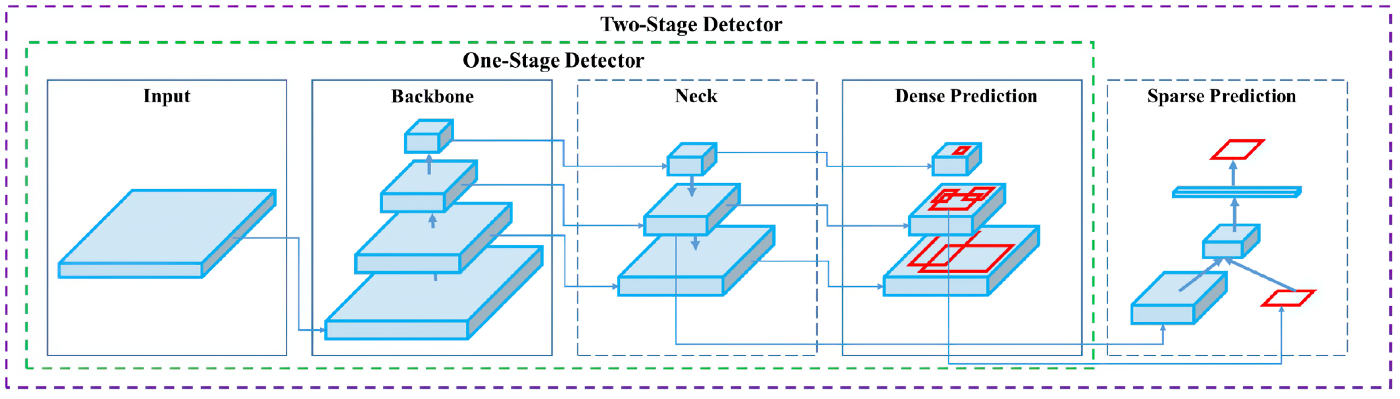

### Выбор архитектуры

Теперь существует множество комбинаций архитектуры, которые вы можете перебрать, чтобы получить оптимальный детектор объектов. Глядя на архитектуру для YOLOv4:

#### Backbone
Можно выбрать из CSPResNeXt50, CSPDarknet53, and EfficientNet B3.
На основе теоретического обоснования и нескольких экспериментов было показано, что нейронная сеть Cspdarknet53 является наиболее оптимальной моделью.

#### Neck
SPP(Spatial pyramid pooling) блок вместе с CSPDarknet53 значительно увеличивает receptive field, выделяет наиболее значимые контекстные объекты и практически не вызывает снижения скорости работы сети.

Здесь используется PANet (Path Aggregation Network) в качестве метода агрегации параметров с разных уровней backbone для разных уровней детектора, а не FPN(Feature Pyramid Network) как в YOLOv3.

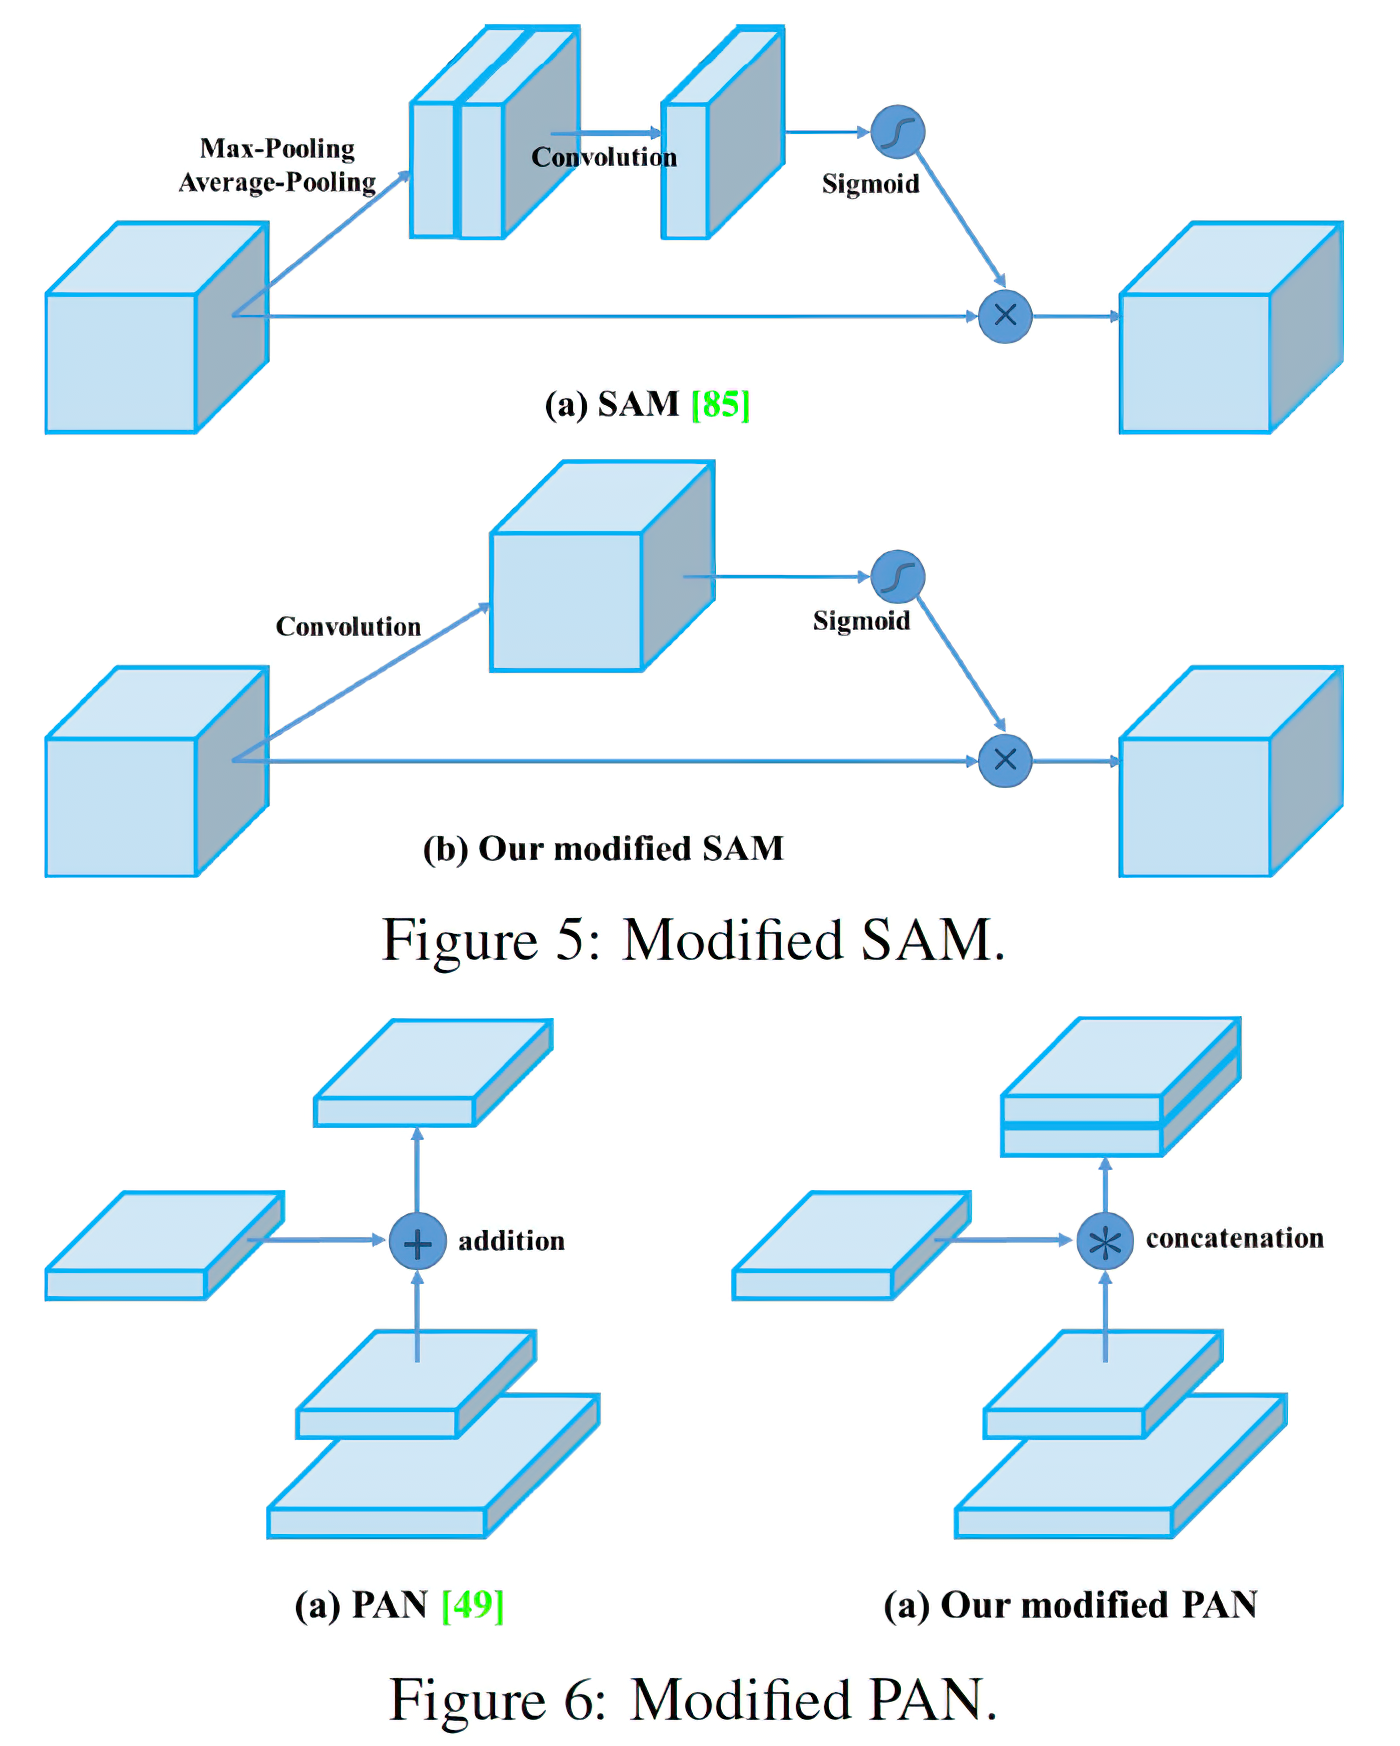

#### Head
YOLO v3 было выбрано в качестве head для YOLO v4.

#### Training Optimizations

В Yolo V4 вы можете сделать некоторые оптимизации метода обучения, чтобы получить лучшую точность без утяжеления вывода. Авторы называют эту стратегию обучения bag of freebies

#### Bag of Freebies (мешок халявы)

Почему назвали так? bag - мешок с набором методов или стратегий, а freebies означает, что точность вывода модели повышается без каких-либо затрат на оборудование с вашей стороны, таким образом вы увеличиваете производительность "бесплатно".


#### backbone - на данный момент авторы используют:

    Cutmix and Mosaic data augmentations,
    Dropblock regularization
    Class label Smoothing


#### Detector - авторы используют:
    CIoU-loss,
    CmBN,
    DropBlock regularization,
    Mosaic data augmentation,
    Self-Adversarial Training (SAT),
    Eliminate grid sensitivity,
    Using multiple anchors for a single ground truth,
    Cosine annealing scheduler
    Optimal hyper-parameters, Random training shapes.

### Bag of Specials

Помимо Bag of Freebies авторы также упоминают о Bag of Specials. Здесь авторы хотят обозначить "specials" как получение чего-то ценного со скидкой или по дешевке. То есть, Bag of Specials это набор модулей, которые требуют небольшого увеличения мощности "железа", но значительно повышают точность обнаружения объекта. Авторы использовали следующее в Yolo V4.

#### Bag of Specials (BoS) для Backbone:

    Mish activation,
    Cross-stage partial connections (CSP), and
    Multiinput weighted residual connections (MiWRC)
    
#### Bag of Specials (BoS) для Detector:

    Mish activation,
    SPP-block, SAM-block,
    PAN path-aggregation block,
    DIoU-NMS


#### Additional Improvements

Для того чтобы разработанный детектор был более пригодным для обучения на одном графическом процессоре, авторы произвели дополнительные проектирование и доработку следующим образом:
Они вводят новый метод data augmentation, называемый Mosaic, и Self-Adversarial Training (SAT)
Они подбирают оптимальные гиперпараметры при применении генетических алгоритмов.
Они также модифицируют некоторые существующие методы, чтобы сделать их конструкцию пригодной для эффективного обучения и обнаружения

#### Эксперименты

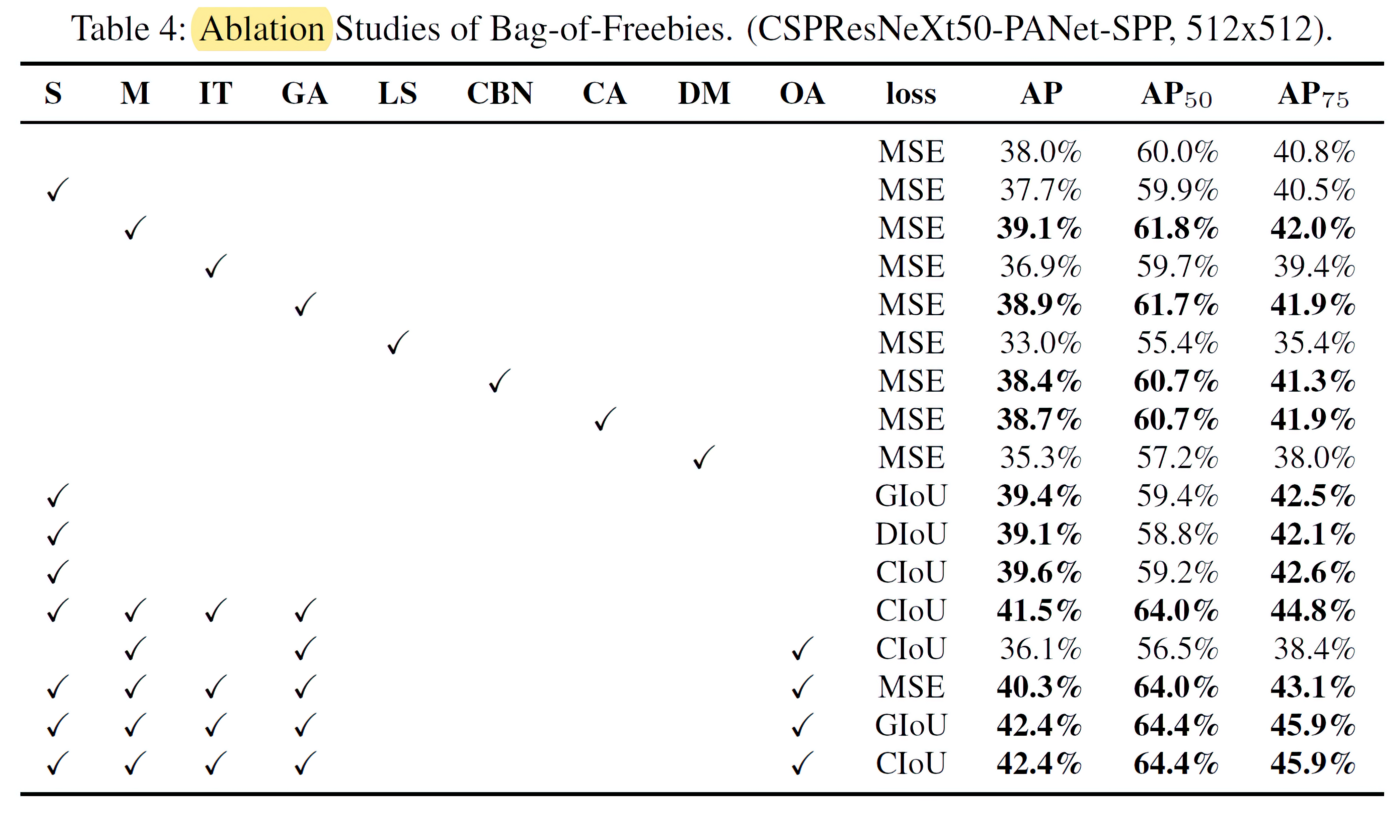

Стратегия, которая была реализована, состояла в том, чтобы протестировать каждую функцию с помощью процесса, называемого ablation study. ablation study - это когда вы систематически удаляете части входного сигнала, чтобы увидеть, какие части входного сигнала имеют отношение к выходу сети. Обычно это выглядит как таблица, подобная этой, с результатами на правой стороне.

#### Результаты

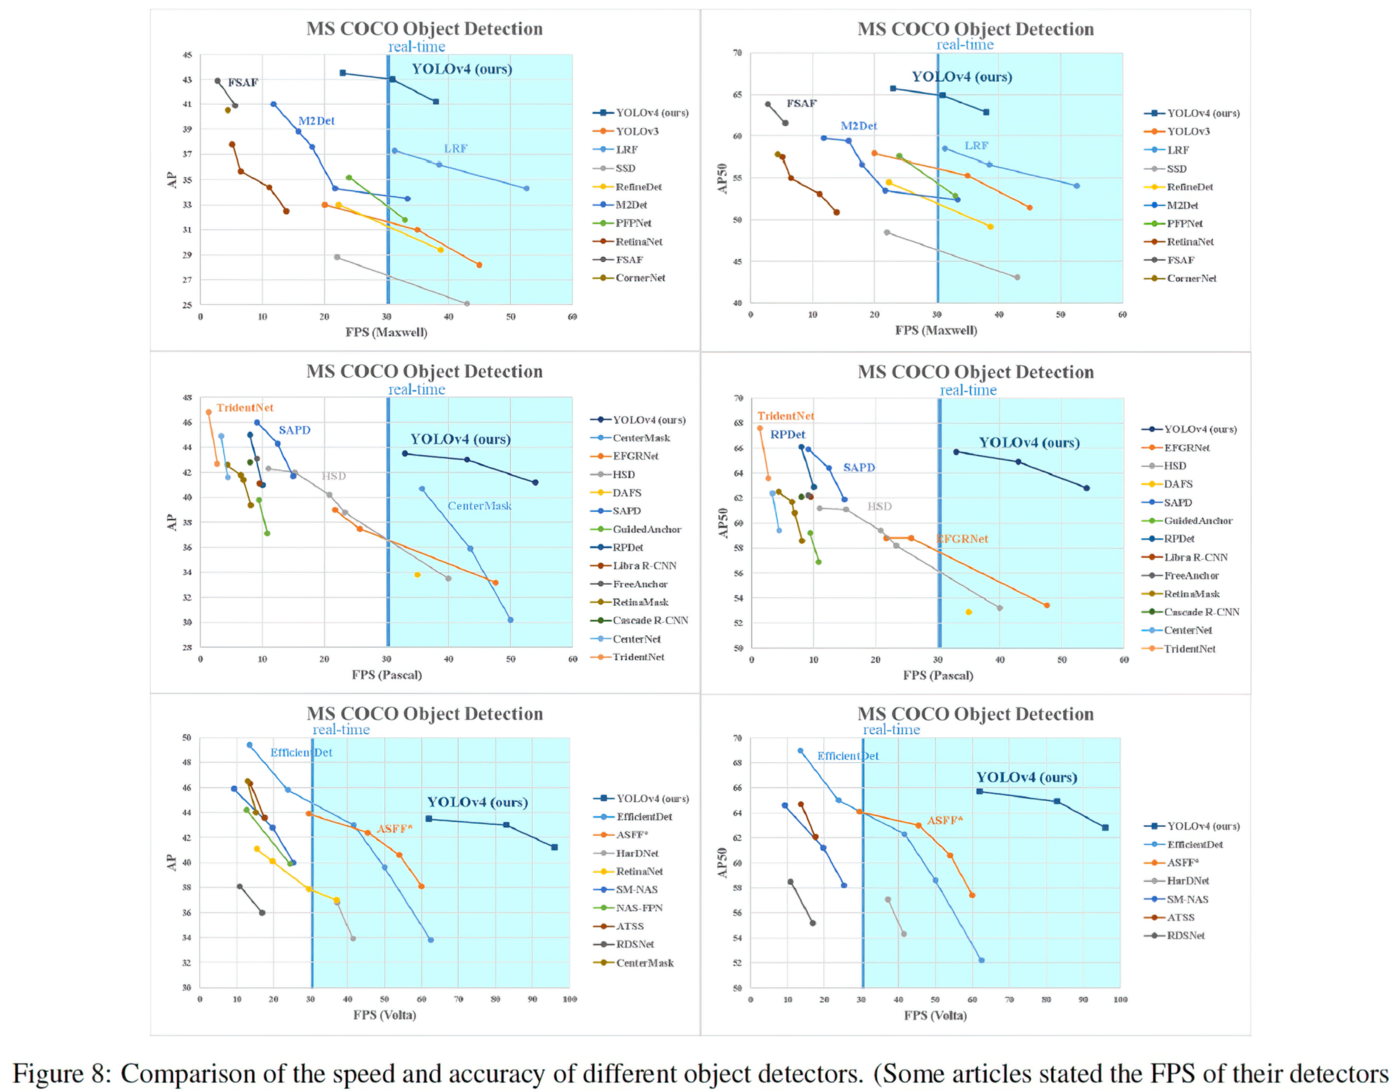

На графиках видно, что YOLO v4, намного опережает YOLO v3, но чуть больше требователен к жеелезу. 

#### Итог

Таким образом, подводя итог, авторы предлагают современный детектор, который быстрее с точки зрения кадров в секунду (FPS) и более точен на MS COCO AP50:::95 и AP50, чем все доступные альтернативные детекторы. Что приятно, так это то, что YOLOv4 можно обучать и использовать на обычном графическом процессоре с 8–16GB VRAM, которые широко доступны.